# チャレンジ: テキスト分析

> このノートブックでは複数のURLを使用して実装します。多くの単語が含まれているためデータサイエンスとは異なり、テキストの分析が問題になってきます。
キーワード抽出を行った後データをクリンナップして意味のない単語の組み合わせを取り除く別の方法を考えていきます。

この例では典型的なデータサイエンスのプロセスに関する全てのステップをカバーしている単純な演習を行います。
コードを書き足す必要はありません。ただ下のセルをクリックして実行するだけで結果を出力させることができます。
より理解を深めるためにコードを別のデータで試してみることをお勧めします。


## 目的

このレッスンではデータサイエンスに関する概念について説明しました。
それではテキストマイニングを利用してより関連性のある概念を理解していきましょう
データサイエンスに関するテキスト操作から初めて、キーワードの抽出を行い、結果を視覚化してみます。

この例ではデータサイエンスに関するウィキペディアのサイトを使用しています。


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Step 1: データの取得

全てのデータサイエンスプロセスではデータの取得が最初のステップです。
`requests`ライブラリを使って実装していきます。

In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4cfd3ffa-3a2e-4a14-8376-d1f025781c5d","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1093166959,"wgRevisionId":1093166959,"wgArticleId":233488,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","CS1 maint: uses authors parameter","CS1 maint: url-status","Articles with short description","Short description 

## Step 2: データの変換

次のステップではデータを処理しやすい形に変換していきます。この場合、HTMLのソースコードをダウンロードして、プレーンテキストの形式に変換します。

これは様々な方法で実装することができます。ここではシンプルなビルドインであるPythonの[HTMLParser](https://docs.python.org/3/library/html.parser.html)オブジェクトを使用します。そして`HTMLParser`をサブクラス化し、`<script>`と`<style>`以外のHTMLタグ内のすべてのテキストを収集するコードを定義します。

In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning  (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine (RVM) Support vector machine (SVM) Clustering BIRCH CURE Hierarch

## Step 3: インサイトの取得

この例ではテキストからキーワードを抽出し、どのキーワードがより意味があるのかを調べます。そのためデータを洞察を引き出すためのデータに変換することが重要になります。

そこでpythonのライブラリである[RAKE](https://github.com/aneesha/RAKE)を使用してキーワードの抽出を行います。以下のセルを実行してライブラリをインストールします。

In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

主な機能は`Rake`オブジェクトから利用でき、引数のパラメータを変更することでカスタマイズすることが可能です。ここではキーワードの最小の長さを5文字に、ドキュメント内のキーワードの最小頻度を3回に、キーワード内の単語の最大数を2単語にせっていした結果を出力します。

In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('main article', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('prentice hall', 4.0),
 ('mit press', 4.0),
 ('cs1 maint', 4.0),
 ('cite web', 4.0),
 ('artificial neuron', 3.9655172413793105),
 ('statistical learning', 3.9411764705882355),
 ('feature learning', 3.9411764705882355),
 ('reinforcement learning', 3.9411764705882355),
 ('deep learning', 3.9411764705882355),
 ('retrieved 2018-08-20', 3.935483870967742),
 ('retrieved 2022-01-17', 3.935483870967742),
 ('machine learning', 3.9089184060721065),
 ('neural networks', 3.9),
 ('pattern recognition', 3.9),
 ('artificial intelligence', 3.8702791461412147),
 ('speech recognition', 3.857142857142857),
 ('bayesian network', 3.857142857142857),
 ('supervised learning', 3.841176470588235),
 ('isbn 978-0-262-01243-0', 3.8181818181818183),
 ('explicitly programmed', 3


見ての通り機械学習やビッグデータなど最も関連性の高いキーワードがリストの上位に表示されています

## Step 4: 結果の可視化
データを可視化することはよりデータの本質を理解するために役に立ちます。
そこで`matplotlib`のpythonライブラリを使用して関連性のあるキーワードの分布を可視化をしてみます。

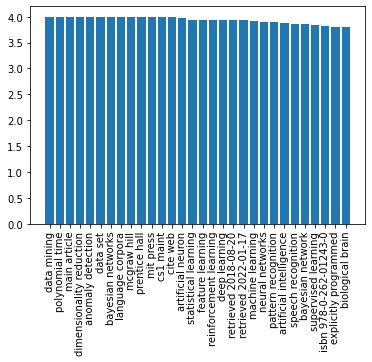

In [7]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

これだと少しわかりにくいのでさらに便利なpythonのライブラリである**Word Cloud**を使用して可視化してみます

In [8]:
!{sys.executable} -m pip install wordcloud

     -------------------------------------- 220.7/220.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=152250 sha256=26c4090e13f4f5faae6c4b07c1b249630fb5a1ed0f352b19941d07ae8e9f1526
  Stored in directory: c:\users\hokuto\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


`WordCloud` object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using `matplotlib`:

`WordCloud`は単語の出現頻度を調べることができます。`matplotlib`を使うことによってその結果をグラフとして可視化することが可能です。

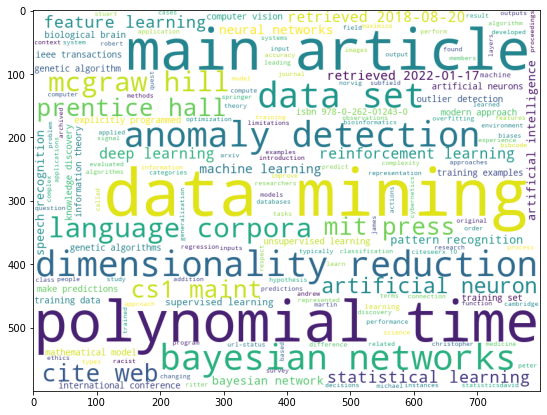

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

元のテキストデータを`WordCloud`に渡すこともできます。

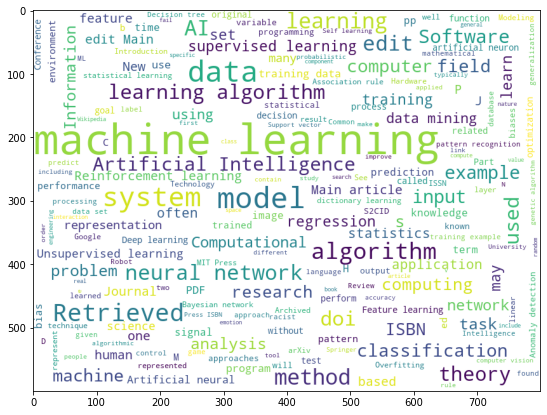

In [10]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [14]:
wc.generate(text).to_file('../images/ds_wordcloud.png')

`WordCloud`はとても便利ではありますが多くノイズも含まれています。(`Retrieved on`など)なのでこのようなノイズを防ぐために、データの前処理とクリーンアップをすることが重要になってきます。

この演習ではキーワードとWordCloudの形でウィキペディアのテキストから文の意味を抽出する簡単なプロセスを実行しました。
この例はデータサイエンティストがデータの操作を行うときにデータの取得から視覚化するまでの典型的な手順を示しています。
非常に重要なことなので覚えておきましょう